# Import necessary libraries


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



# Load the dataset

In [12]:
df = pd.read_csv('../data/benin-malanville.csv')


# Summary Statistics

## Display the first few rows of the dataset

In [13]:
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Calculate summary statistics for numeric columns

In [17]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0

# Data Quality Check

## 1. Check for missing values


In [24]:
# print("\nMissing Values:")
df.isnull().sum()
# print(missing_values[missing_values > 0])

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

## 2. Check for negative values in columns where only positive values are expected

In [20]:
print("\nNegative Values Check:")
negative_values = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].lt(0).sum()
print(negative_values[negative_values > 0])


Negative Values Check:
GHI    258847
DNI    275987
DHI    259182
dtype: int64


## 3. Identify outliers using IQR (Interquartile Range) method for key columns


In [21]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]


## Check for outliers in sensor readings and wind speed data


In [27]:
print("\nOutliers in Sensor Readings (ModA, ModB):")
modA_outliers = identify_outliers_iqr(df['ModA'])
modB_outliers = identify_outliers_iqr(df['ModB'])
print(f"ModA Outliers: {len(modA_outliers)}")
print(f"ModB Outliers: {len(modB_outliers)}")


Outliers in Sensor Readings (ModA, ModB):
ModA Outliers: 98
ModB Outliers: 240


In [28]:
print("\nOutliers in Wind Speed Data (WS, WSgust):")
WS_outliers = identify_outliers_iqr(df['WS'])
WSgust_outliers = identify_outliers_iqr(df['WSgust'])
print(f"WS Outliers: {len(WS_outliers)}")
print(f"WSgust Outliers: {len(WSgust_outliers)}")



Outliers in Wind Speed Data (WS, WSgust):
WS Outliers: 6717
WSgust Outliers: 5368


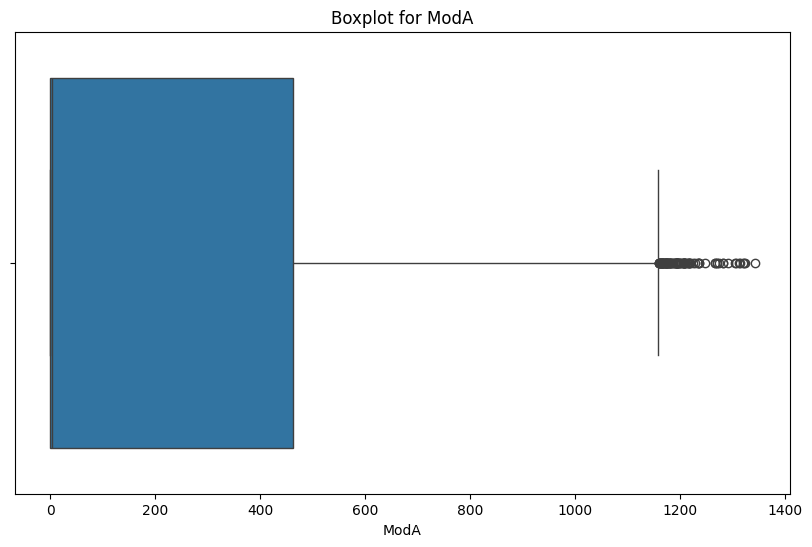


Visualizing Outliers:

Visualizing Outliers:


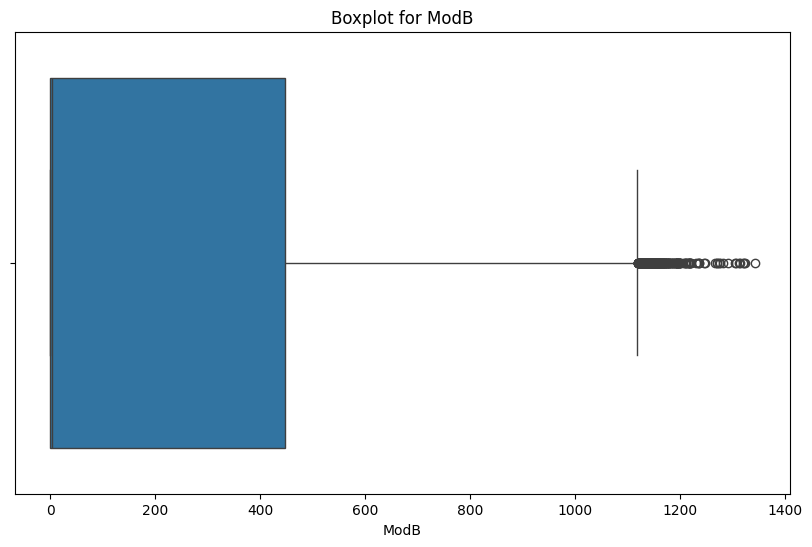


Visualizing Outliers:

Visualizing Outliers:


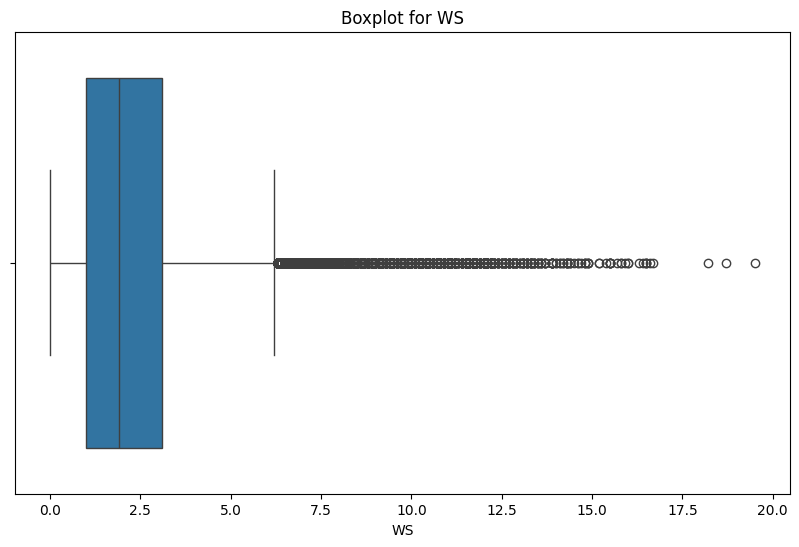


Visualizing Outliers:

Visualizing Outliers:


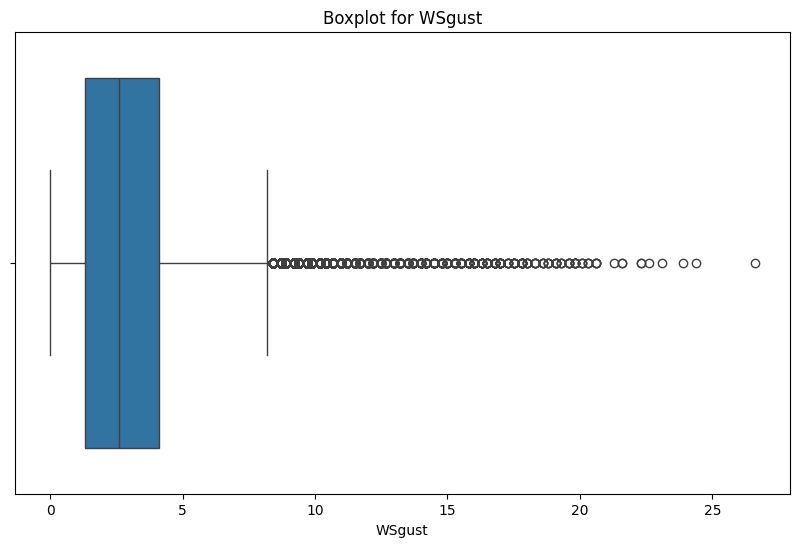


Visualizing Outliers:

Visualizing Outliers:


In [31]:
def plot_outliers(column_name, data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data)
    plt.title(f'Boxplot for {column_name}')
    plt.show()
    print("\nVisualizing Outliers:")
    print("\nVisualizing Outliers:")
plot_outliers('ModA', df['ModA'])
plot_outliers('ModB', df['ModB'])
plot_outliers('WS', df['WS'])
plot_outliers('WSgust', df['WSgust'])


# Convert 'Timestamp' column to datetime format and set it as the index


In [32]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Display the first few rows of the dataset to confirm changes


In [33]:
print("Dataset with Timestamp as Index:")
display(df.head())

Dataset with Timestamp as Index:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Time Series Analysis


## 1. Plot Global Horizontal Irradiance (GHI) over time


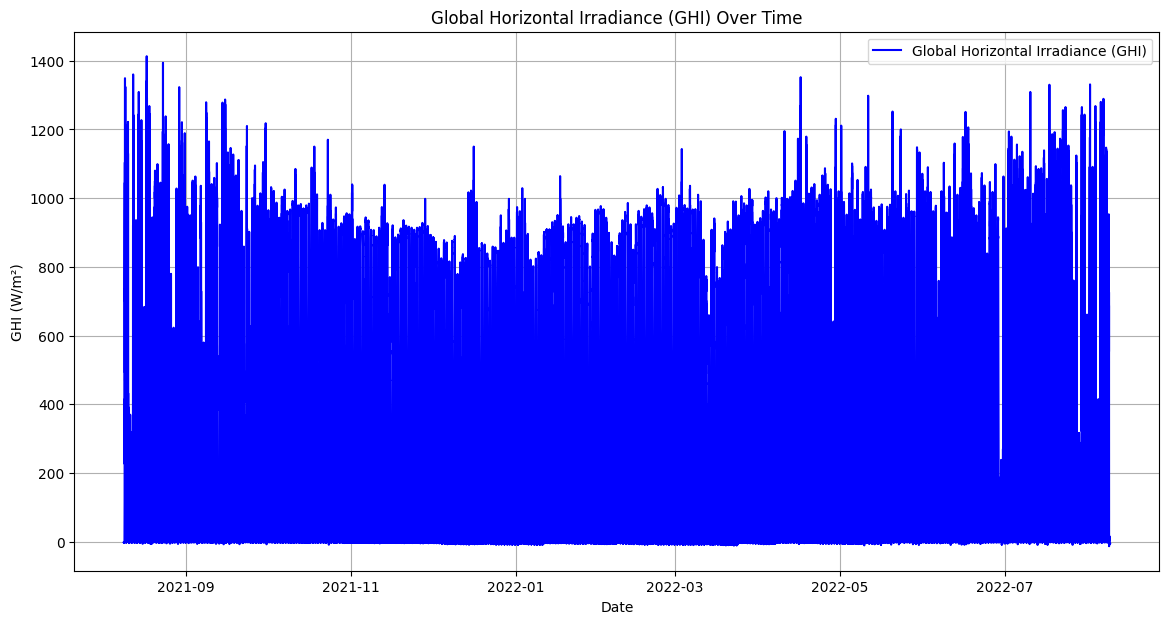

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['GHI'], label='Global Horizontal Irradiance (GHI)', color='blue')
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.xlabel('Date')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.grid(True)
plt.show()

## 2. Plot Direct Normal Irradiance (DNI) over time


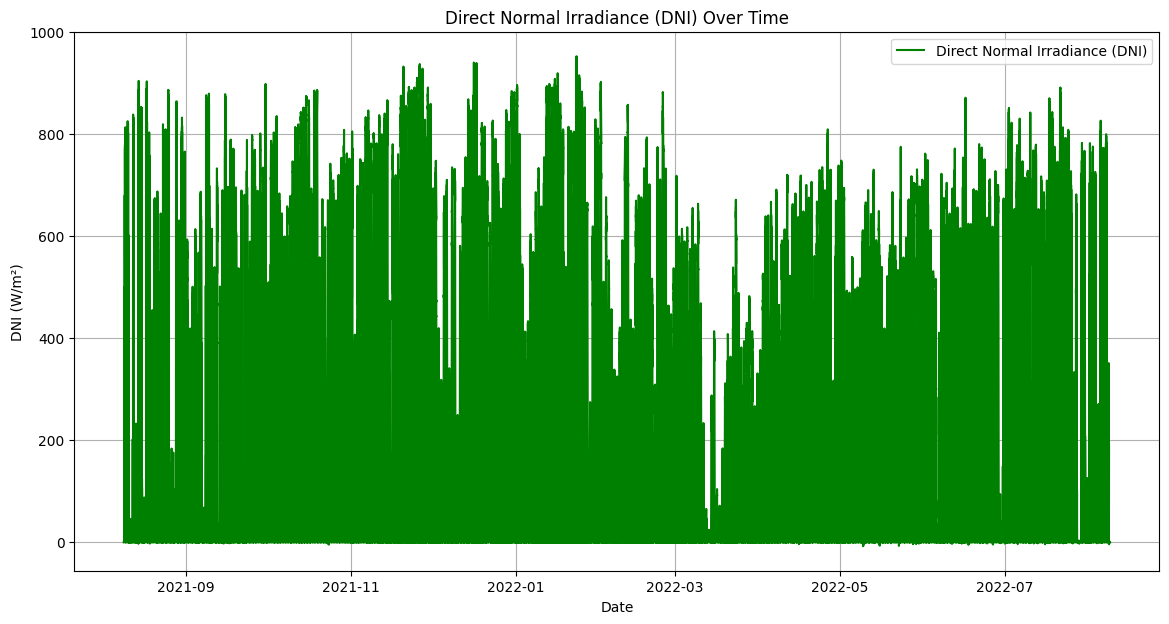

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['DNI'], label='Direct Normal Irradiance (DNI)', color='green')
plt.title('Direct Normal Irradiance (DNI) Over Time')
plt.xlabel('Date')
plt.ylabel('DNI (W/m²)')
plt.legend()
plt.grid(True)
plt.show()


## 3. Plot Diffuse Horizontal Irradiance (DHI) over time


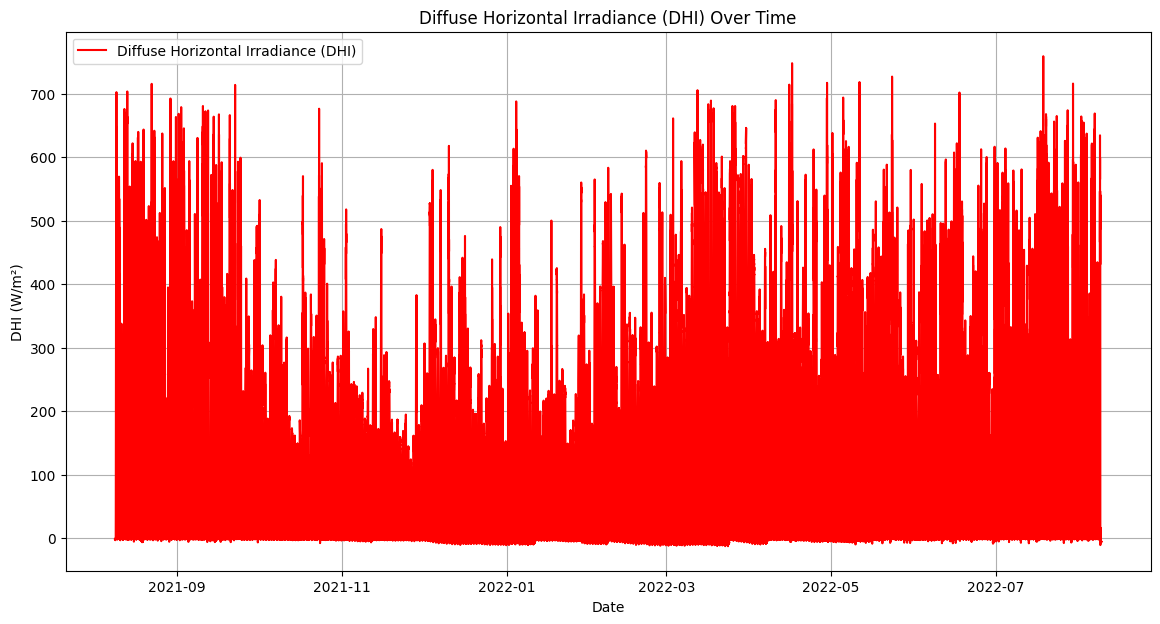

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['DHI'], label='Diffuse Horizontal Irradiance (DHI)', color='red')
plt.title('Diffuse Horizontal Irradiance (DHI) Over Time')
plt.xlabel('Date')
plt.ylabel('DHI (W/m²)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluating the Impact of Cleaning

## ModA


Text(0, 0.5, 'ModA (W/m²)')

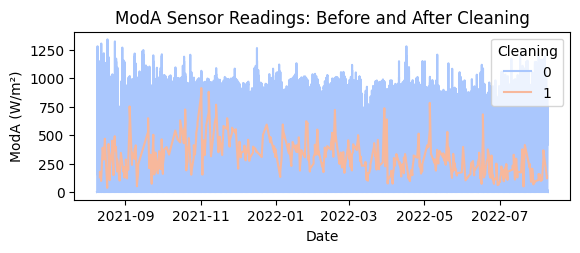

In [38]:
plt.subplot(2, 1, 1)
sns.lineplot(data=df, x=df.index, y='ModA', hue='Cleaning', palette='coolwarm')
plt.title('ModA Sensor Readings: Before and After Cleaning')
plt.xlabel('Date')
plt.ylabel('ModA (W/m²)')

## ModB


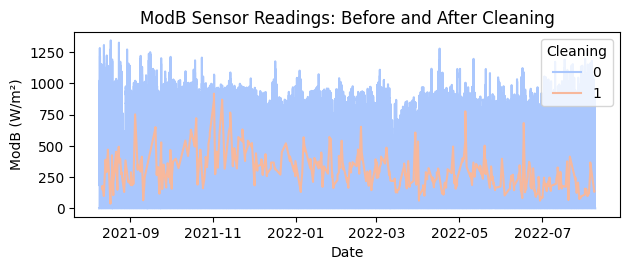

In [39]:
plt.subplot(2, 1, 2)
sns.lineplot(data=df, x=df.index, y='ModB', hue='Cleaning', palette='coolwarm')
plt.title('ModB Sensor Readings: Before and After Cleaning')
plt.xlabel('Date')
plt.ylabel('ModB (W/m²)')

plt.tight_layout()
plt.show()

# Correlation Analysis

## Calculate and plot Correlation Heatmap


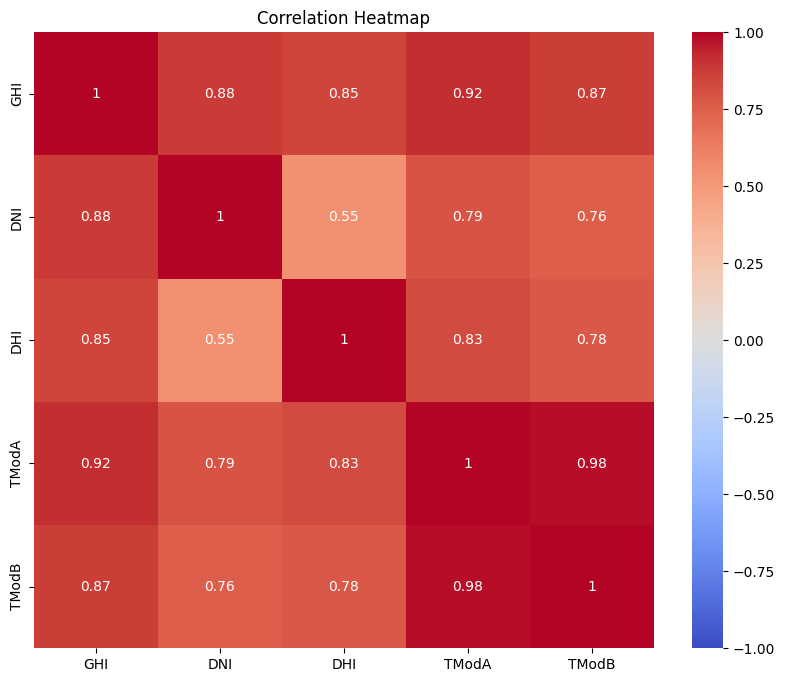

In [40]:
correlation_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## Plot Pair Plot for Solar Radiation and Temperature Measures


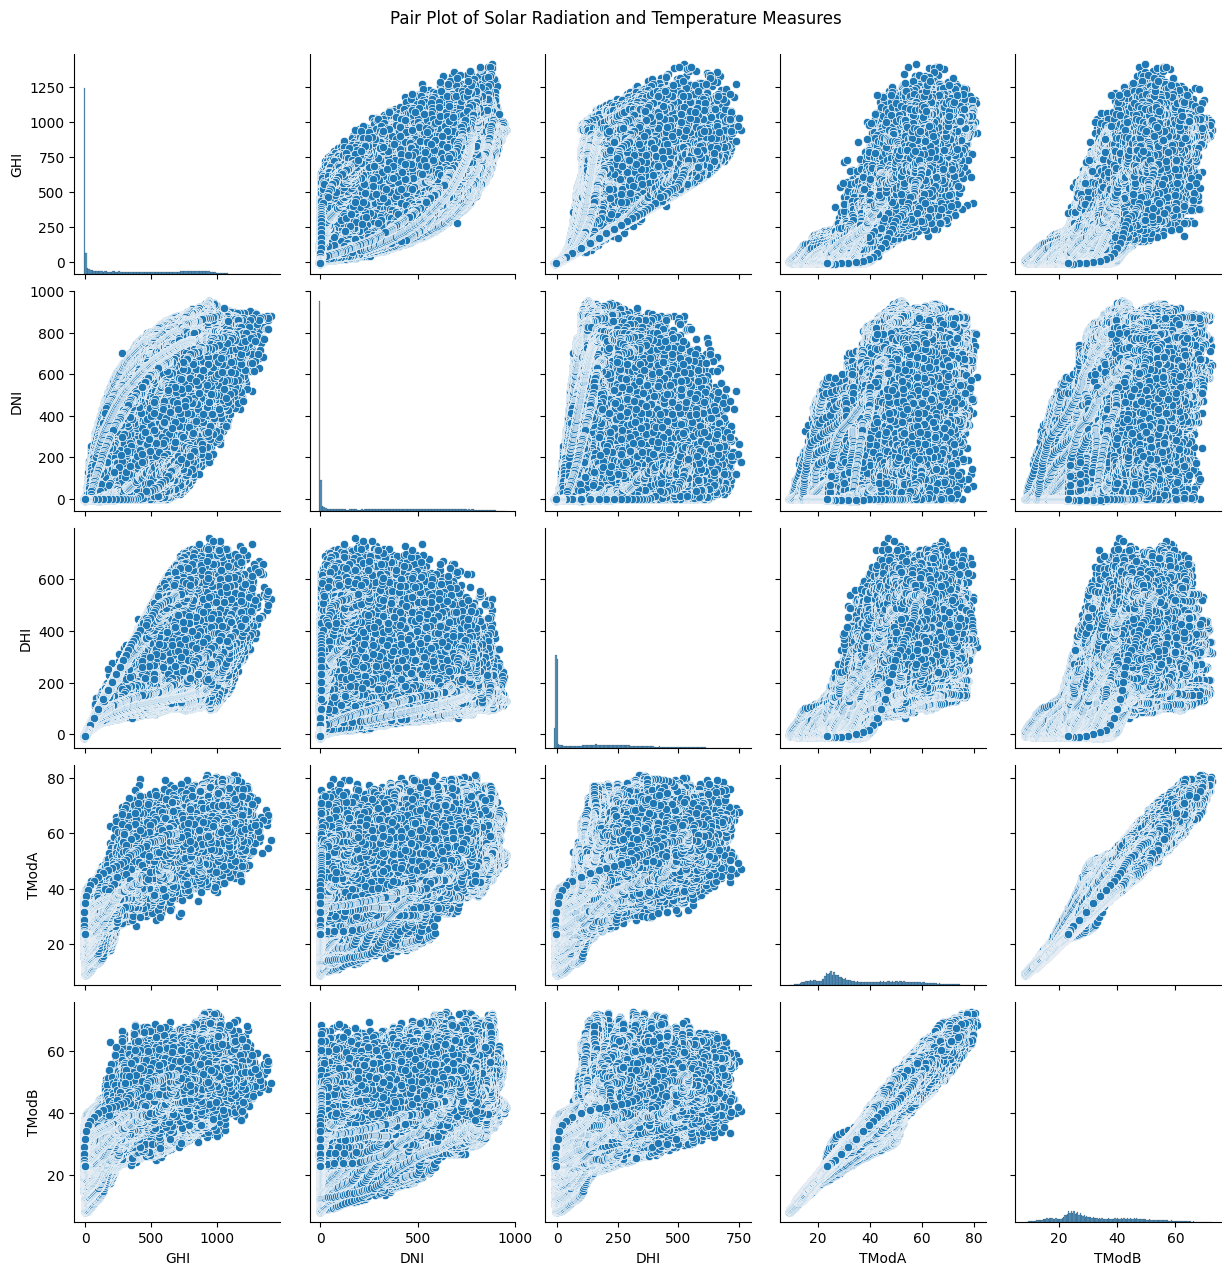

In [41]:
sns.pairplot(df[correlation_columns])
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

## Plot Scatter Matrix for Wind Conditions and Solar Irradiance using PairGrid


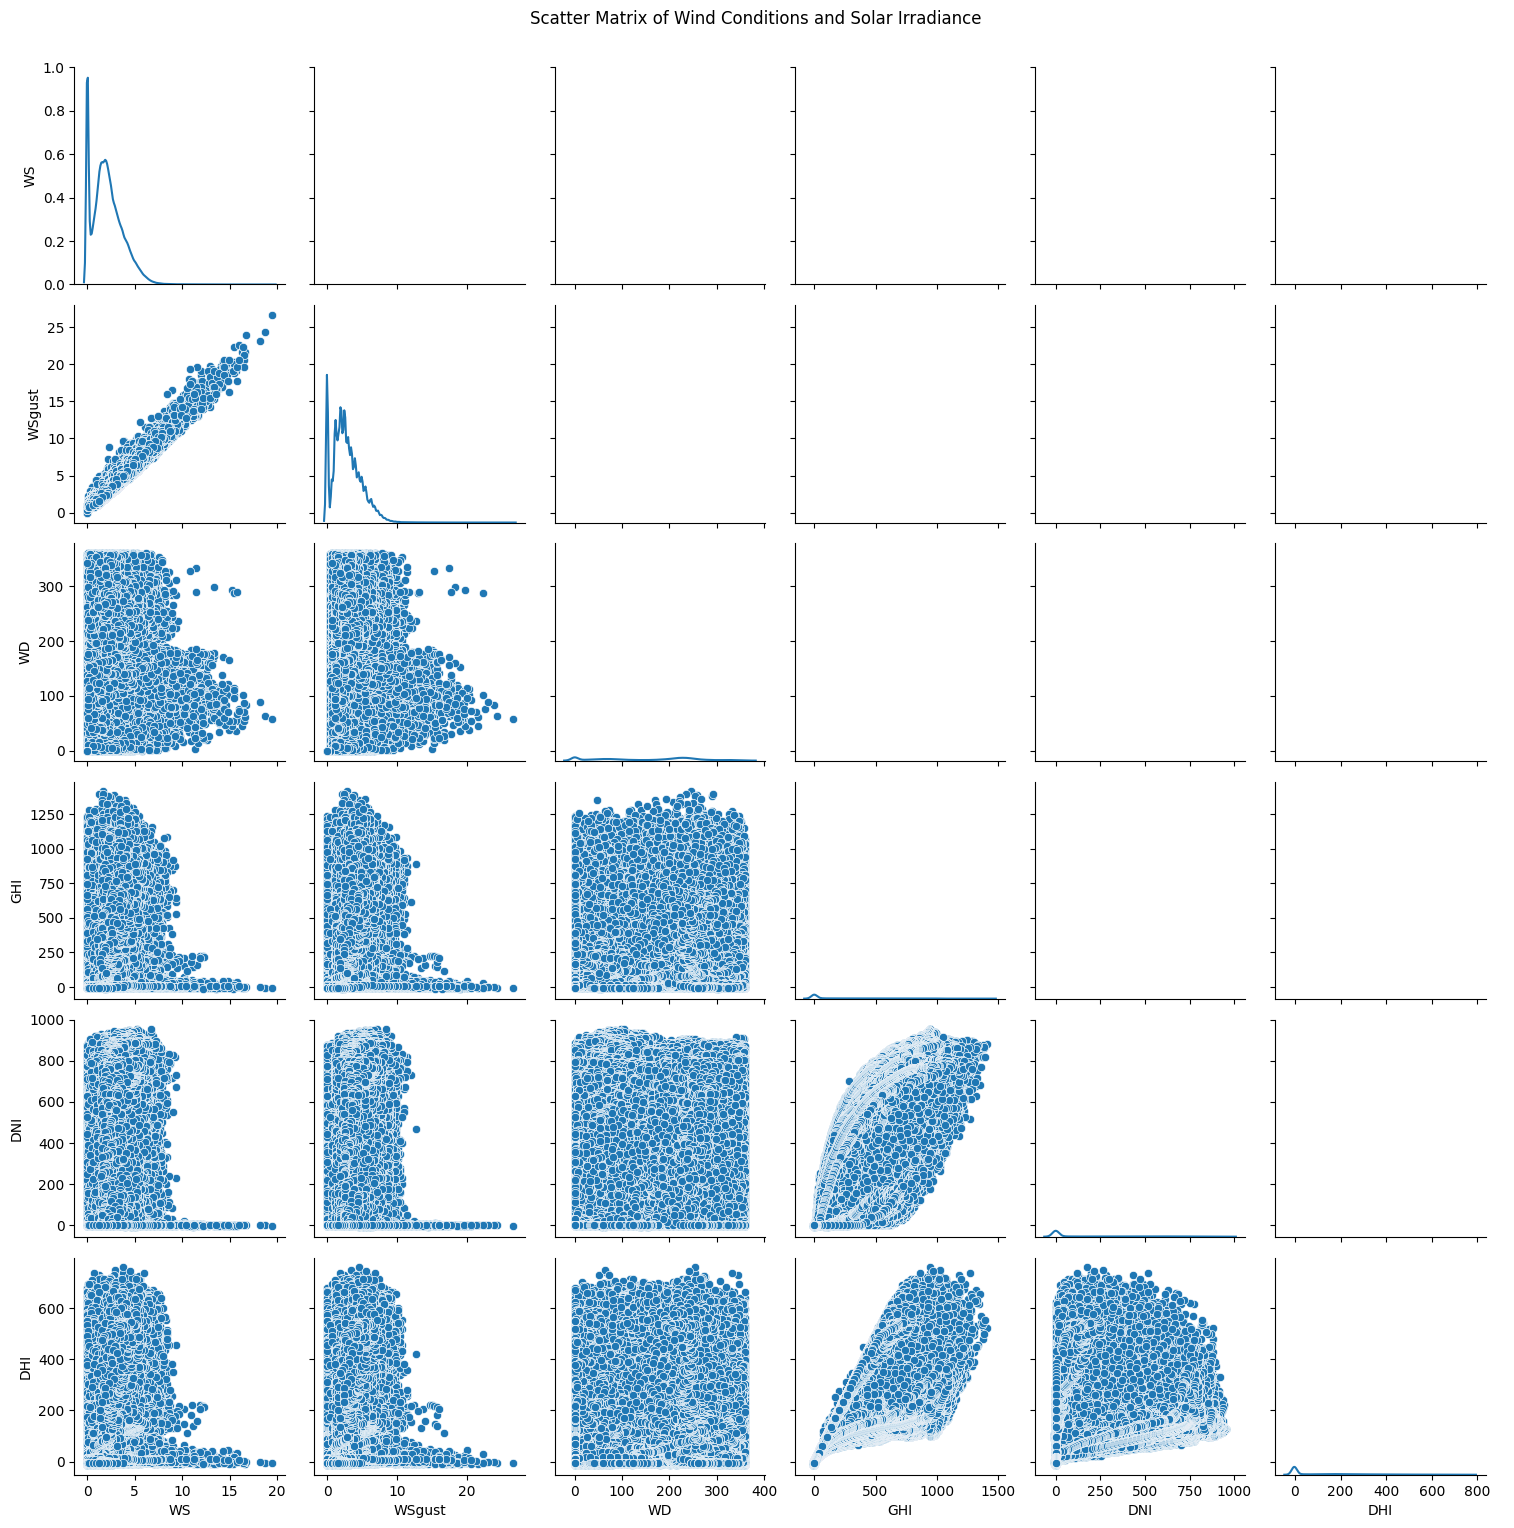

In [43]:
wind_irradiance_columns = ['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI']

g = sns.PairGrid(df[wind_irradiance_columns])
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.add_legend()
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

# Wind Analysis Using Polar Plots

### Plot Wind Speed Distribution


In [44]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

### Wind Speed Polar Plot


Text(0.5, 1.0, 'Wind Speed Distribution')

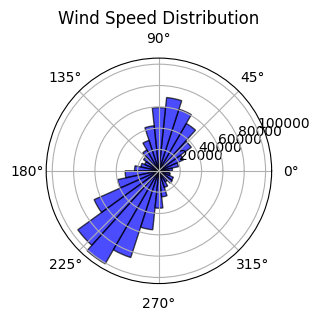

In [45]:
ax1 = plt.subplot(1, 2, 1, polar=True)
wind_speeds = df['WS'].dropna()
wind_directions = np.deg2rad(df['WD'].dropna())

ax1.hist(wind_directions, bins=30, weights=wind_speeds, color='b', alpha=0.7, edgecolor='black')
ax1.set_title('Wind Speed Distribution')

# Temperature Analysis

### Correlation matrix


In [47]:
correlation_matrix = df[['RH', 'Tamb', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']].corr()


### Plot Correlation Heatmap


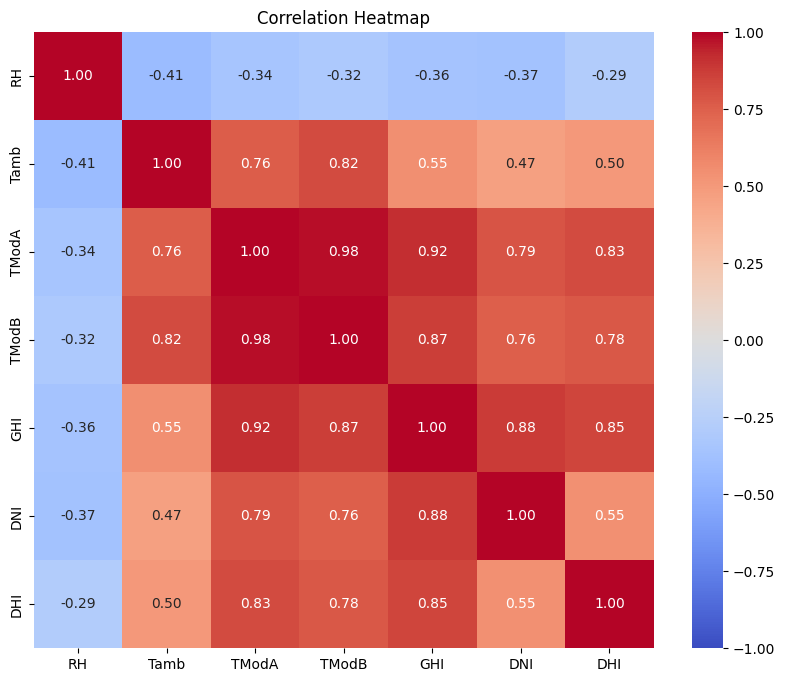

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Scatter plots


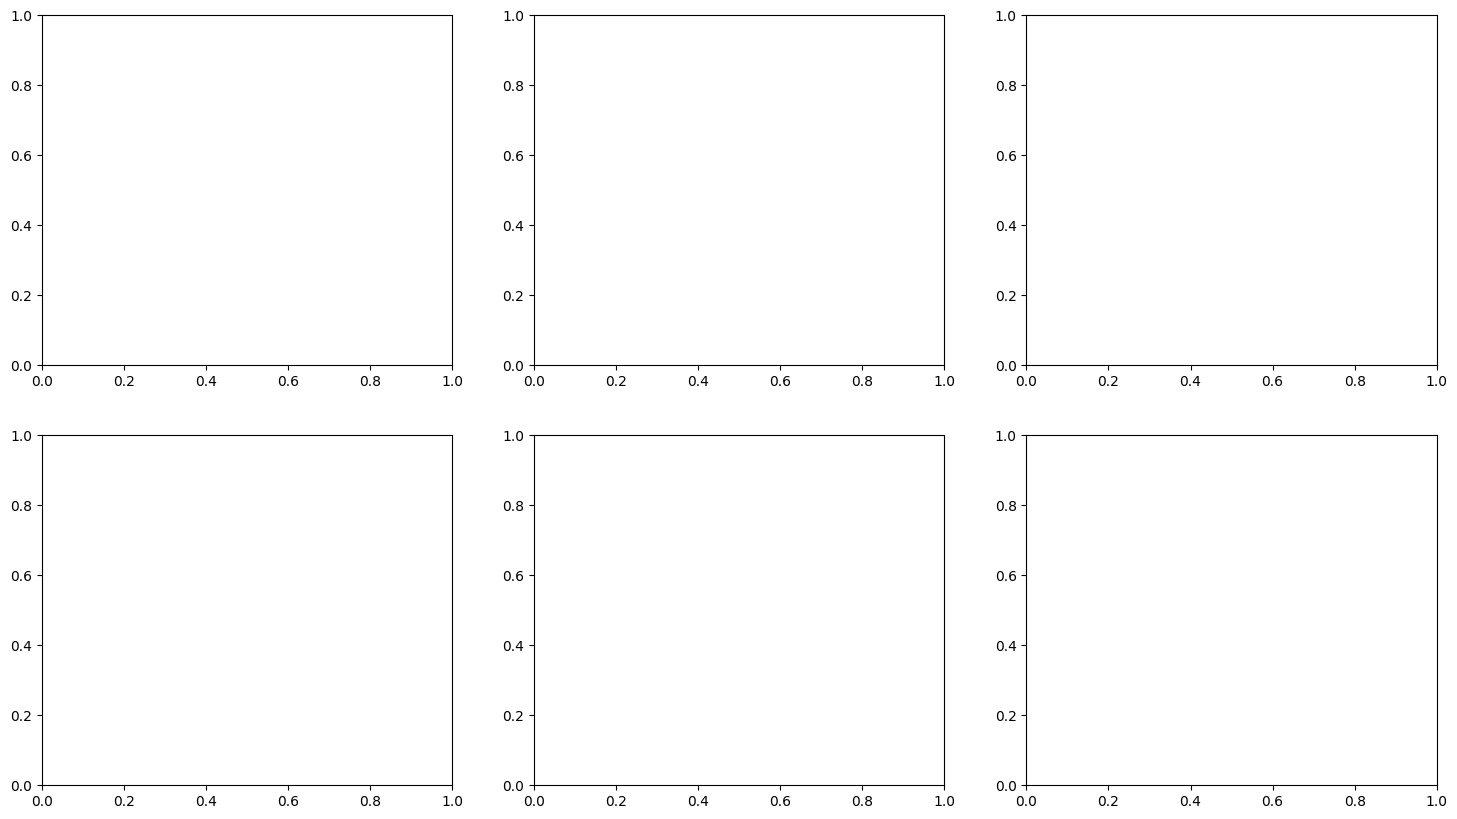

In [49]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

### RH vs Tamb


In [50]:
sns.scatterplot(x='RH', y='Tamb', data=df, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('RH vs Ambient Temperature (Tamb)')

Text(0.5, 1.0, 'RH vs Ambient Temperature (Tamb)')

### RH vs TModA


In [51]:
sns.scatterplot(x='RH', y='TModA', data=df, ax=axs[0, 1], color='green')
axs[0, 1].set_title('RH vs Module A Temperature (TModA)')

Text(0.5, 1.0, 'RH vs Module A Temperature (TModA)')

### RH vs TModB


In [52]:
sns.scatterplot(x='RH', y='TModB', data=df, ax=axs[0, 2], color='red')
axs[0, 2].set_title('RH vs Module B Temperature (TModB)')


Text(0.5, 1.0, 'RH vs Module B Temperature (TModB)')

### RH vs GHI


In [53]:
sns.scatterplot(x='RH', y='GHI', data=df, ax=axs[1, 0], color='purple')
axs[1, 0].set_title('RH vs Global Horizontal Irradiance (GHI)')


Text(0.5, 1.0, 'RH vs Global Horizontal Irradiance (GHI)')


### RH vs DNI


In [54]:
sns.scatterplot(x='RH', y='DNI', data=df, ax=axs[1, 1], color='orange')
axs[1, 1].set_title('RH vs Direct Normal Irradiance (DNI)')



Text(0.5, 1.0, 'RH vs Direct Normal Irradiance (DNI)')

### RH vs DHI


In [55]:
sns.scatterplot(x='RH', y='DHI', data=df, ax=axs[1, 2], color='brown')
axs[1, 2].set_title('RH vs Diffuse Horizontal Irradiance (DHI)')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Histograms

### Variables to plot


In [56]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']
titles = ['Global Horizontal Irradiance (GHI)', 'Direct Normal Irradiance (DNI)', 
          'Diffuse Horizontal Irradiance (DHI)', 'Wind Speed (WS)', 
          'Ambient Temperature (Tamb)', 'Module A Temperature (TModA)', 
          'Module B Temperature (TModB)']



### Create histograms


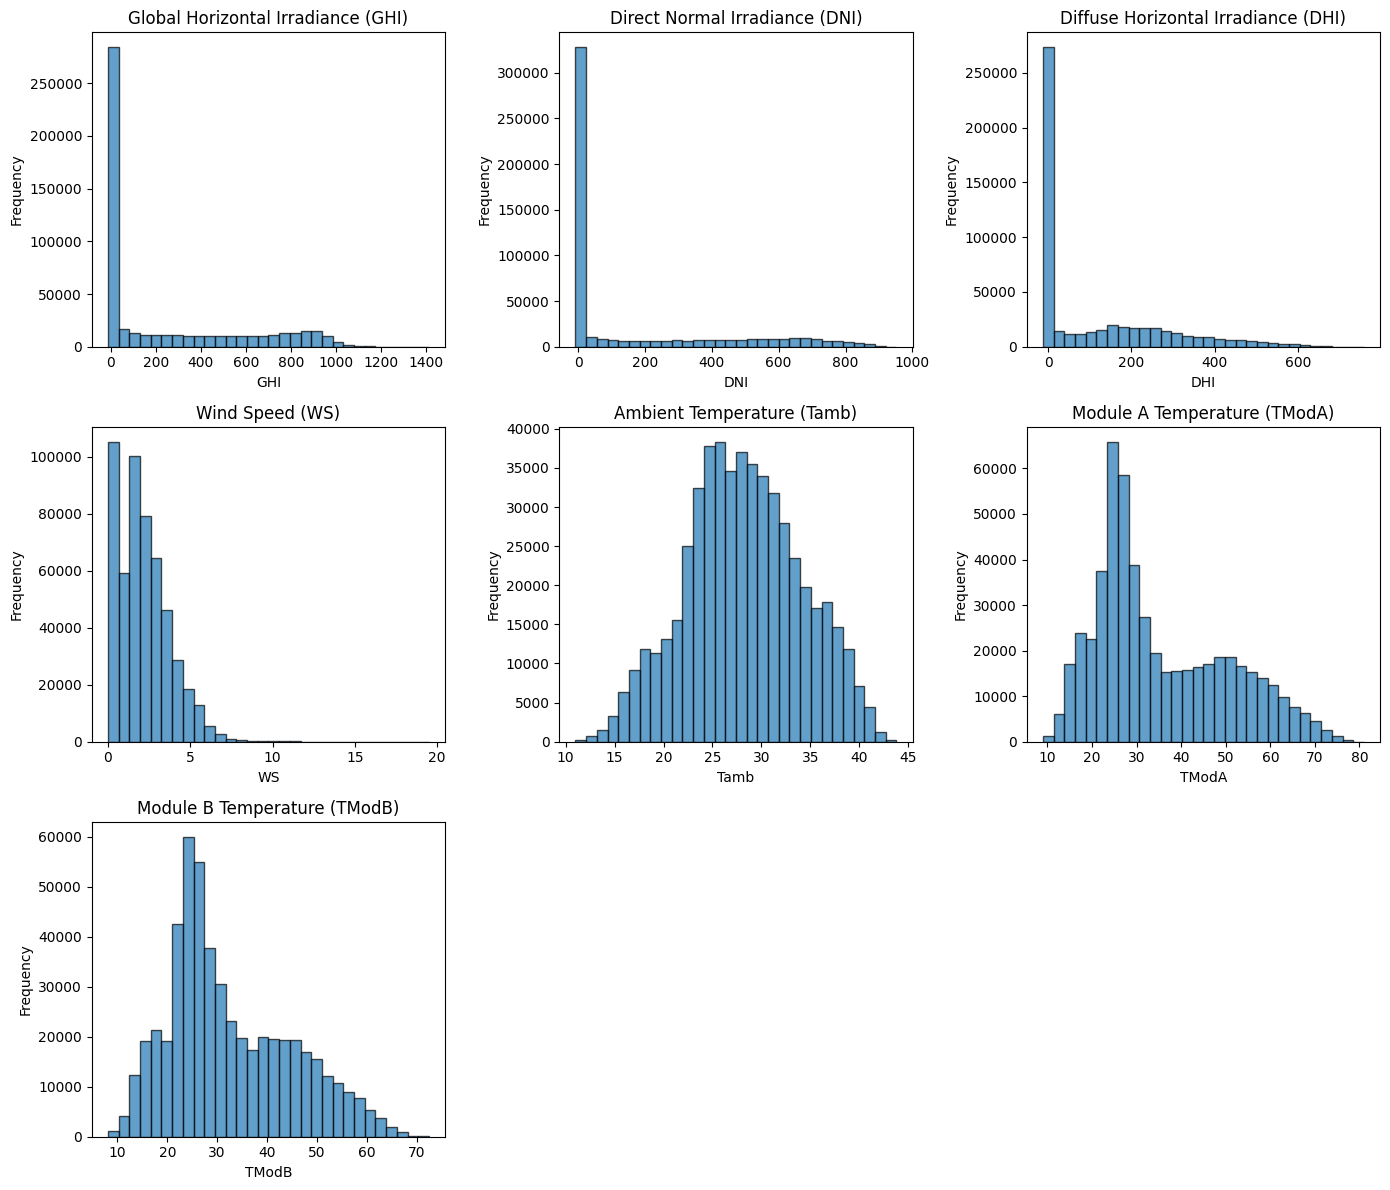

In [57]:
plt.figure(figsize=(14, 12))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[var], bins=30, edgecolor='k', alpha=0.7)
    plt.title(titles[i])
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Z-Score Analysis

### Variables to calculate Z-scores


In [58]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

### Calculate Z-scores


In [62]:
df_z_scores = df.copy()
for var in variables:
    mean = df[var].mean()
    std_dev = df[var].std()
    df_z_scores[f'{var}_zscore'] = (df[var] - mean) / std_dev

### Identify outliers (Z-score > 3 or Z-score < -3)


In [63]:
outliers = df_z_scores[(df_z_scores.filter(like='_zscore') > 3) | (df_z_scores.filter(like='_zscore') < -3)]



### Print a sample of outliers


In [64]:
print("Sample of Outliers:")
print(outliers.head())



Sample of Outliers:
                     GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
Timestamp                                                                       
2021-08-09 00:01:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:02:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:03:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:04:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2021-08-09 00:05:00  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   

                     ...  TModA  TModB  Comments  GHI_zscore  DNI_zscore  \
Timestamp            ...                                                   
2021-08-09 00:01:00  ...    NaN    NaN       NaN         NaN         NaN   
2021-08-09 00:02:00  ...    NaN    NaN       NaN         NaN         NaN   
2021-08-09 00:03:00  ...    NaN    NaN       NaN         NaN         NaN   
2021-08-09 00:04:00  ...    NaN 

### Plot histograms of Z-scores


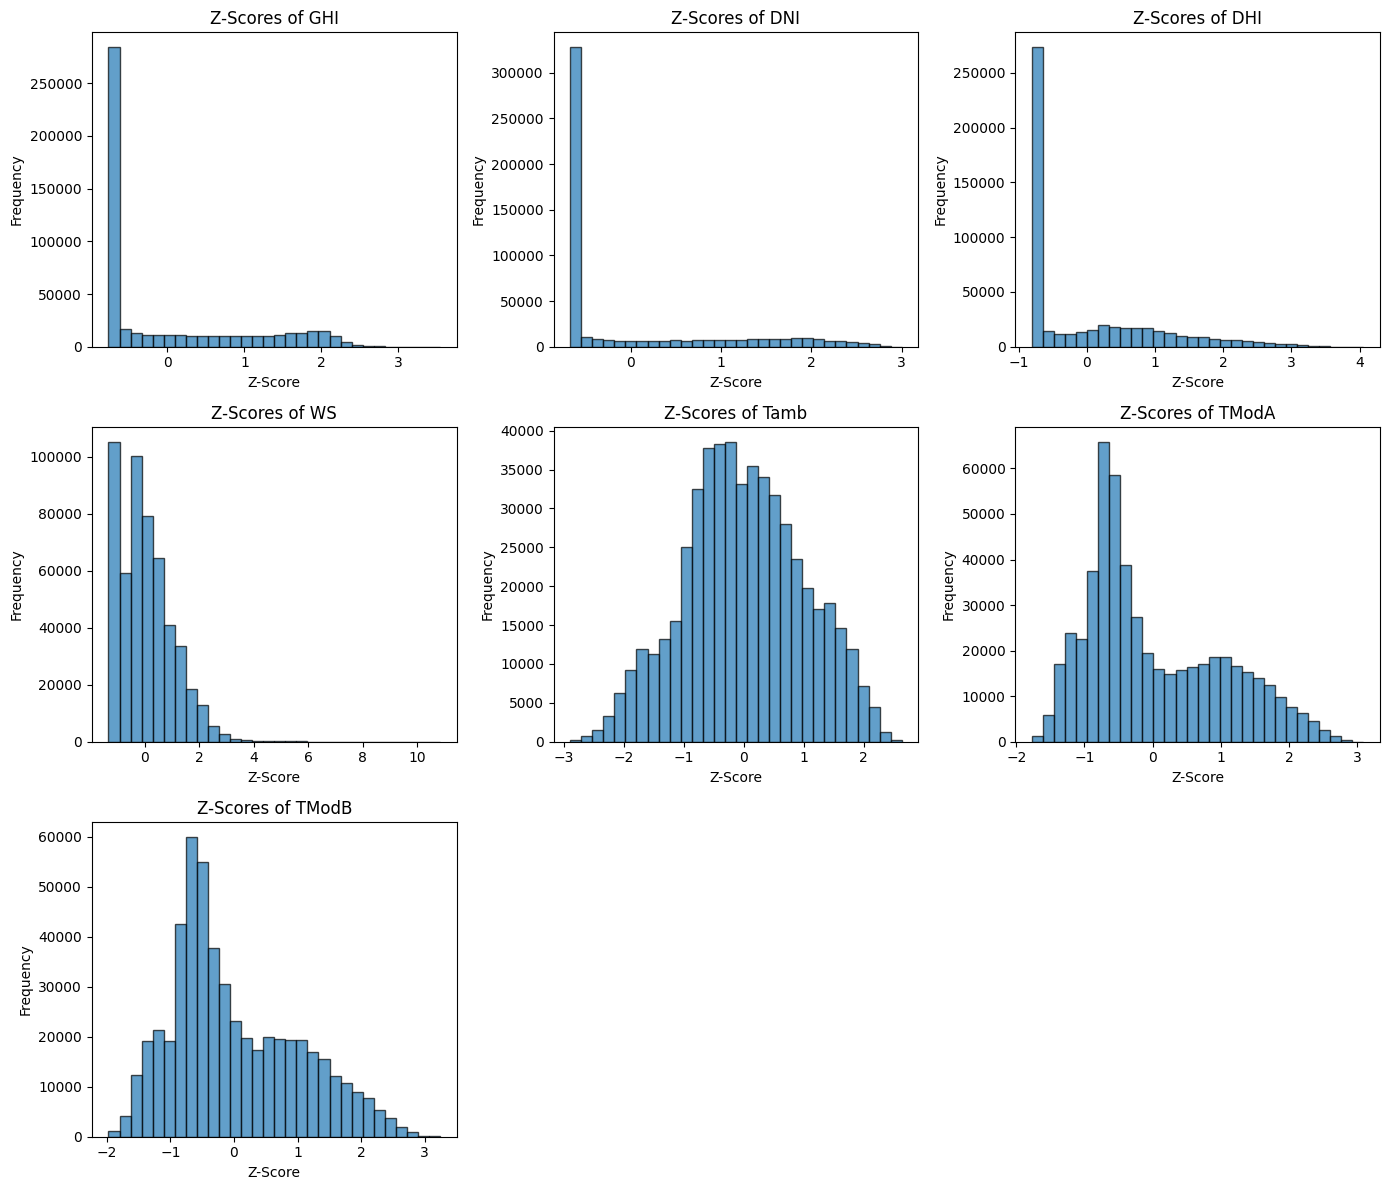

In [65]:
plt.figure(figsize=(14, 12))
for i, var in enumerate(variables):
    plt.subplot(3, 3, i + 1)
    plt.hist(df_z_scores[f'{var}_zscore'], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Z-Scores of {var}')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Bubble Chart

### Variables for the bubble chart



In [66]:
x_var = 'GHI'   # X-axis variable
y_var = 'Tamb'  # Y-axis variable
size_var = 'RH' # Bubble size variable

### Normalize bubble size for better visualization


In [67]:
df[size_var] = np.clip(df[size_var], 0, 100)  # Clip RH values to a range for better visualization
sizes = df[size_var] * 10  # Scale the sizes for better visibility

### Create the bubble chart


C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_62444\3700262606.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df[x_var], df[y_var], s=sizes, alpha=0.5, edgecolors='w', cmap='viridis')


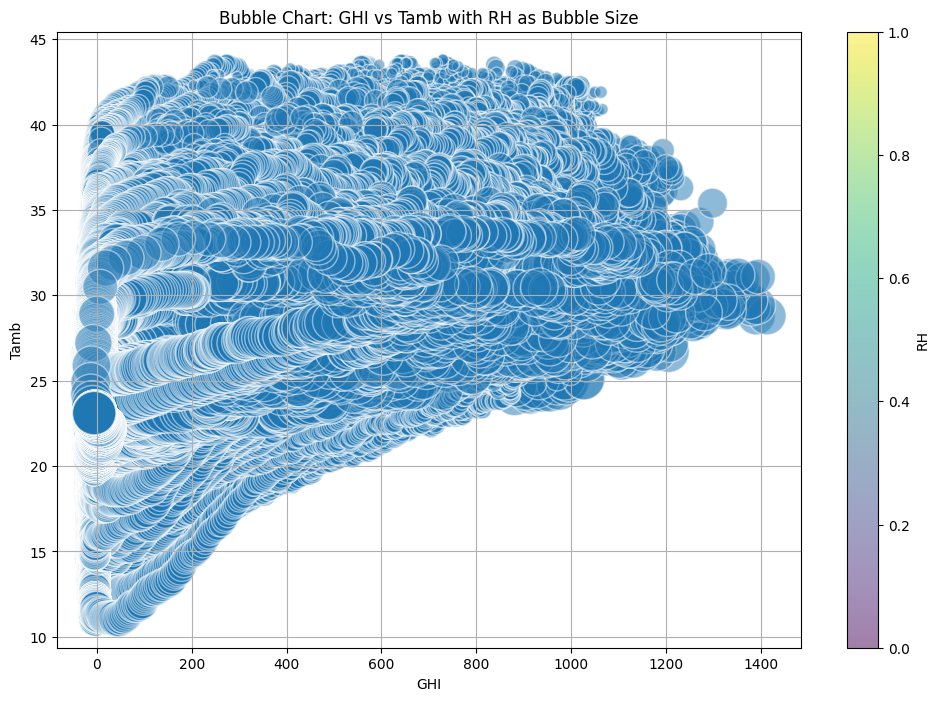

In [68]:
plt.figure(figsize=(12, 8))
plt.scatter(df[x_var], df[y_var], s=sizes, alpha=0.5, edgecolors='w', cmap='viridis')
plt.colorbar(label=size_var)
plt.title(f'Bubble Chart: {x_var} vs {y_var} with {size_var} as Bubble Size')
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.grid(True)
plt.show()

# Data Cleaning

### Display cleaned dataset information



In [69]:
print("\nCleaned Dataset Info:")
print(df.info())
print("\nCleaned Missing Values:")
print(df.isnull().sum())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   GHI            525600 non-null  float64
 1   DNI            525600 non-null  float64
 2   DHI            525600 non-null  float64
 3   ModA           525600 non-null  float64
 4   ModB           525600 non-null  float64
 5   Tamb           525600 non-null  float64
 6   RH             525600 non-null  float64
 7   WS             525600 non-null  float64
 8   WSgust         525600 non-null  float64
 9   WSstdev        525600 non-null  float64
 10  WD             525600 non-null  float64
 11  WDstdev        525600 non-null  float64
 12  BP             525600 non-null  int64  
 13  Cleaning       525600 non-null  int64  
 14  Precipitation  525600 non-null  float64
 15  TModA          525600 non-null  float64
 16  TModB          52

### Optionally, save the cleaned dataset



In [71]:
cleaned_dataset_path = '../data/benin-malanville-cleaned.csv'
df.to_csv(cleaned_dataset_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_dataset_path}")


Cleaned dataset saved to ../data/benin-malanville-cleaned.csv
